# Time Series analysis - Dave

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
import seaborn as sns

In [50]:
train = pd.read_csv("../dataset/train.csv")
test = pd.read_csv("../dataset/x_test.csv")

In [51]:
train.head()

Unnamed: 0   sku    pack  size (GM)   brand  price  \
0  WE 10 December 2016  2689  SINGLE     395.41  BRAND1   1.16   
1  WE 17 December 2016  2689  SINGLE     395.41  BRAND1   1.15   
2  WE 24 December 2016  2689  SINGLE     395.41  BRAND1   1.16   
3  WE 31 December 2016  2689  SINGLE     395.41  BRAND1   1.16   
4   WE 07 January 2017  2689  SINGLE     395.41  BRAND1   1.16   

   POS_exposed w-1  volume_on_promo w-1  sales w-1  scope   target  
0              NaN                  NaN        NaN      0  24175.0  
1              1.0            17.676112    24175.0      0  23521.0  
2              1.0            24.482803    23521.0      0  22075.0  
3              0.0            19.410646    22075.0      0  16492.0  
4              0.0            29.812030    16492.0      0  25971.0

In [52]:
test.head()

Unnamed: 0   sku    pack  size (GM)   brand  price  POS_exposed w-1  \
0  WE 29 June 2019  1027  SINGLE     114.23  BRAND2   0.56             10.0   
1  WE 06 July 2019  1027  SINGLE     114.23  BRAND2   0.55              4.0   
2  WE 13 July 2019  1027  SINGLE     114.23  BRAND2   0.45              0.0   
3  WE 20 July 2019  1027  SINGLE     114.23  BRAND2   0.50             19.0   
4  WE 27 July 2019  1027  SINGLE     114.23  BRAND2   0.42             26.0   

   volume_on_promo w-1  sales w-1  scope  
0            24.386541    66337.0      1  
1            37.437842    49992.0      1  
2            28.039623    58062.0      1  
3           100.000000    90908.0      1  
4            99.191839   108957.0      1

In [53]:
train.shape

(5719, 11)

In [54]:
test.shape

(300, 10)

In [90]:
def convert_date(df):
    df["Unnamed: 0"] = df["Unnamed: 0"].str.split(" ")
    df["Unnamed: 0"] = df["Unnamed: 0"].apply(lambda x: "-".join(x[1:]))
    df = df.rename(columns = {'Unnamed: 0':'Date'})
    df = df.rename(columns = {'sku':'SKU'})
    df = df.rename(columns = {'POS_exposed w-1':'POS_exp_w-1'})
    df = df.rename(columns = {'volume_on_promo w-1':'%vol_promo_w-1'})
    df = df.rename(columns = {'sales w-1':'sales_w-1'})
    df.Date = pd.to_datetime(df.Date)
    return df    

In [91]:
df = pd.concat([train, test])

In [92]:
df = convert_date(df)

In [93]:
df = df.sort_values(['Date','SKU'])
df = df.reset_index(drop=True)
df

Date   SKU    pack  size (GM)   brand  price  POS_exp_w-1  \
0    2016-12-10   144   MULTI     114.23  BRAND2   2.18          NaN   
1    2016-12-10   546  SINGLE     114.23  BRAND2   0.52          NaN   
2    2016-12-10   549  SINGLE     114.23  BRAND2   0.51          NaN   
3    2016-12-10   554  SINGLE     114.23  BRAND2   0.52          NaN   
4    2016-12-10   686   MULTI     125.65  BRAND4   2.16          NaN   
...         ...   ...     ...        ...     ...    ...          ...   
6014 2019-12-14  1035  SINGLE     114.23  BRAND2   0.55          6.0   
6015 2019-12-14  1051   MULTI     125.65  BRAND4   2.99          0.0   
6016 2019-12-14  1058  SINGLE     125.65  BRAND4   0.56          0.0   
6017 2019-12-14  1065  SINGLE     125.65  BRAND4   0.57          7.0   
6018 2019-12-14  1206  SINGLE     125.65  BRAND4   0.56          6.0   

      %vol_promo_w-1  sales_w-1  scope    target  
0                NaN        NaN      1   51320.0  
1                NaN        NaN      1   76232.0  
2                NaN        NaN      1   37595.0  
3                NaN        NaN      1  122206.0  
4                NaN        NaN      1   54995.0  
...              ...        ...    ...       ...  
6014       36.060336    38087.0      1       NaN  
6015      100.000000    24597.0      1       NaN  
6016       25.368425    27794.0      1       NaN  
6017       37.921239    79456.0      1       NaN  
6018       29.153580    37889.0      1       NaN  

[6019 rows x 11 columns]

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.pack = le.fit_transform(df.pack)
le.classes_

array(['MULTI', 'SINGLE'], dtype=object)

In [104]:
df.brand = le.fit_transform(df.brand)
le.classes_

array(['BRAND1', 'BRAND2', 'BRAND3', 'BRAND4', 'BRAND5'], dtype=object)

## Detecting NAN rows
### As expected we have NaN in the first row of each different SKU and for every row in the test set

In [105]:
df[df.isnull().any(axis=1)]

Date   SKU  pack  size (GM)  brand  price  POS_exp_w-1  \
0    2016-12-10   144     0     114.23      1   2.18          NaN   
1    2016-12-10   546     1     114.23      1   0.52          NaN   
2    2016-12-10   549     1     114.23      1   0.51          NaN   
3    2016-12-10   554     1     114.23      1   0.52          NaN   
4    2016-12-10   686     0     125.65      3   2.16          NaN   
...         ...   ...   ...        ...    ...    ...          ...   
6014 2019-12-14  1035     1     114.23      1   0.55          6.0   
6015 2019-12-14  1051     0     125.65      3   2.99          0.0   
6016 2019-12-14  1058     1     125.65      3   0.56          0.0   
6017 2019-12-14  1065     1     125.65      3   0.57          7.0   
6018 2019-12-14  1206     1     125.65      3   0.56          6.0   

      %vol_promo_w-1  sales_w-1  scope    target  
0                NaN        NaN      1   51320.0  
1                NaN        NaN      1   76232.0  
2                NaN        NaN      1   37595.0  
3                NaN        NaN      1  122206.0  
4                NaN        NaN      1   54995.0  
...              ...        ...    ...       ...  
6014       36.060336    38087.0      1       NaN  
6015      100.000000    24597.0      1       NaN  
6016       25.368425    27794.0      1       NaN  
6017       37.921239    79456.0      1       NaN  
6018       29.153580    37889.0      1       NaN  

[343 rows x 11 columns]

In [106]:
train[train.isnull().any(axis=1)].shape

(43, 11)

# Some plots

In [209]:
# select the style from fivethityeight website
mpl.rcdefaults() 
plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams.update({'font.size': 16})

np.random.seed(238746)

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

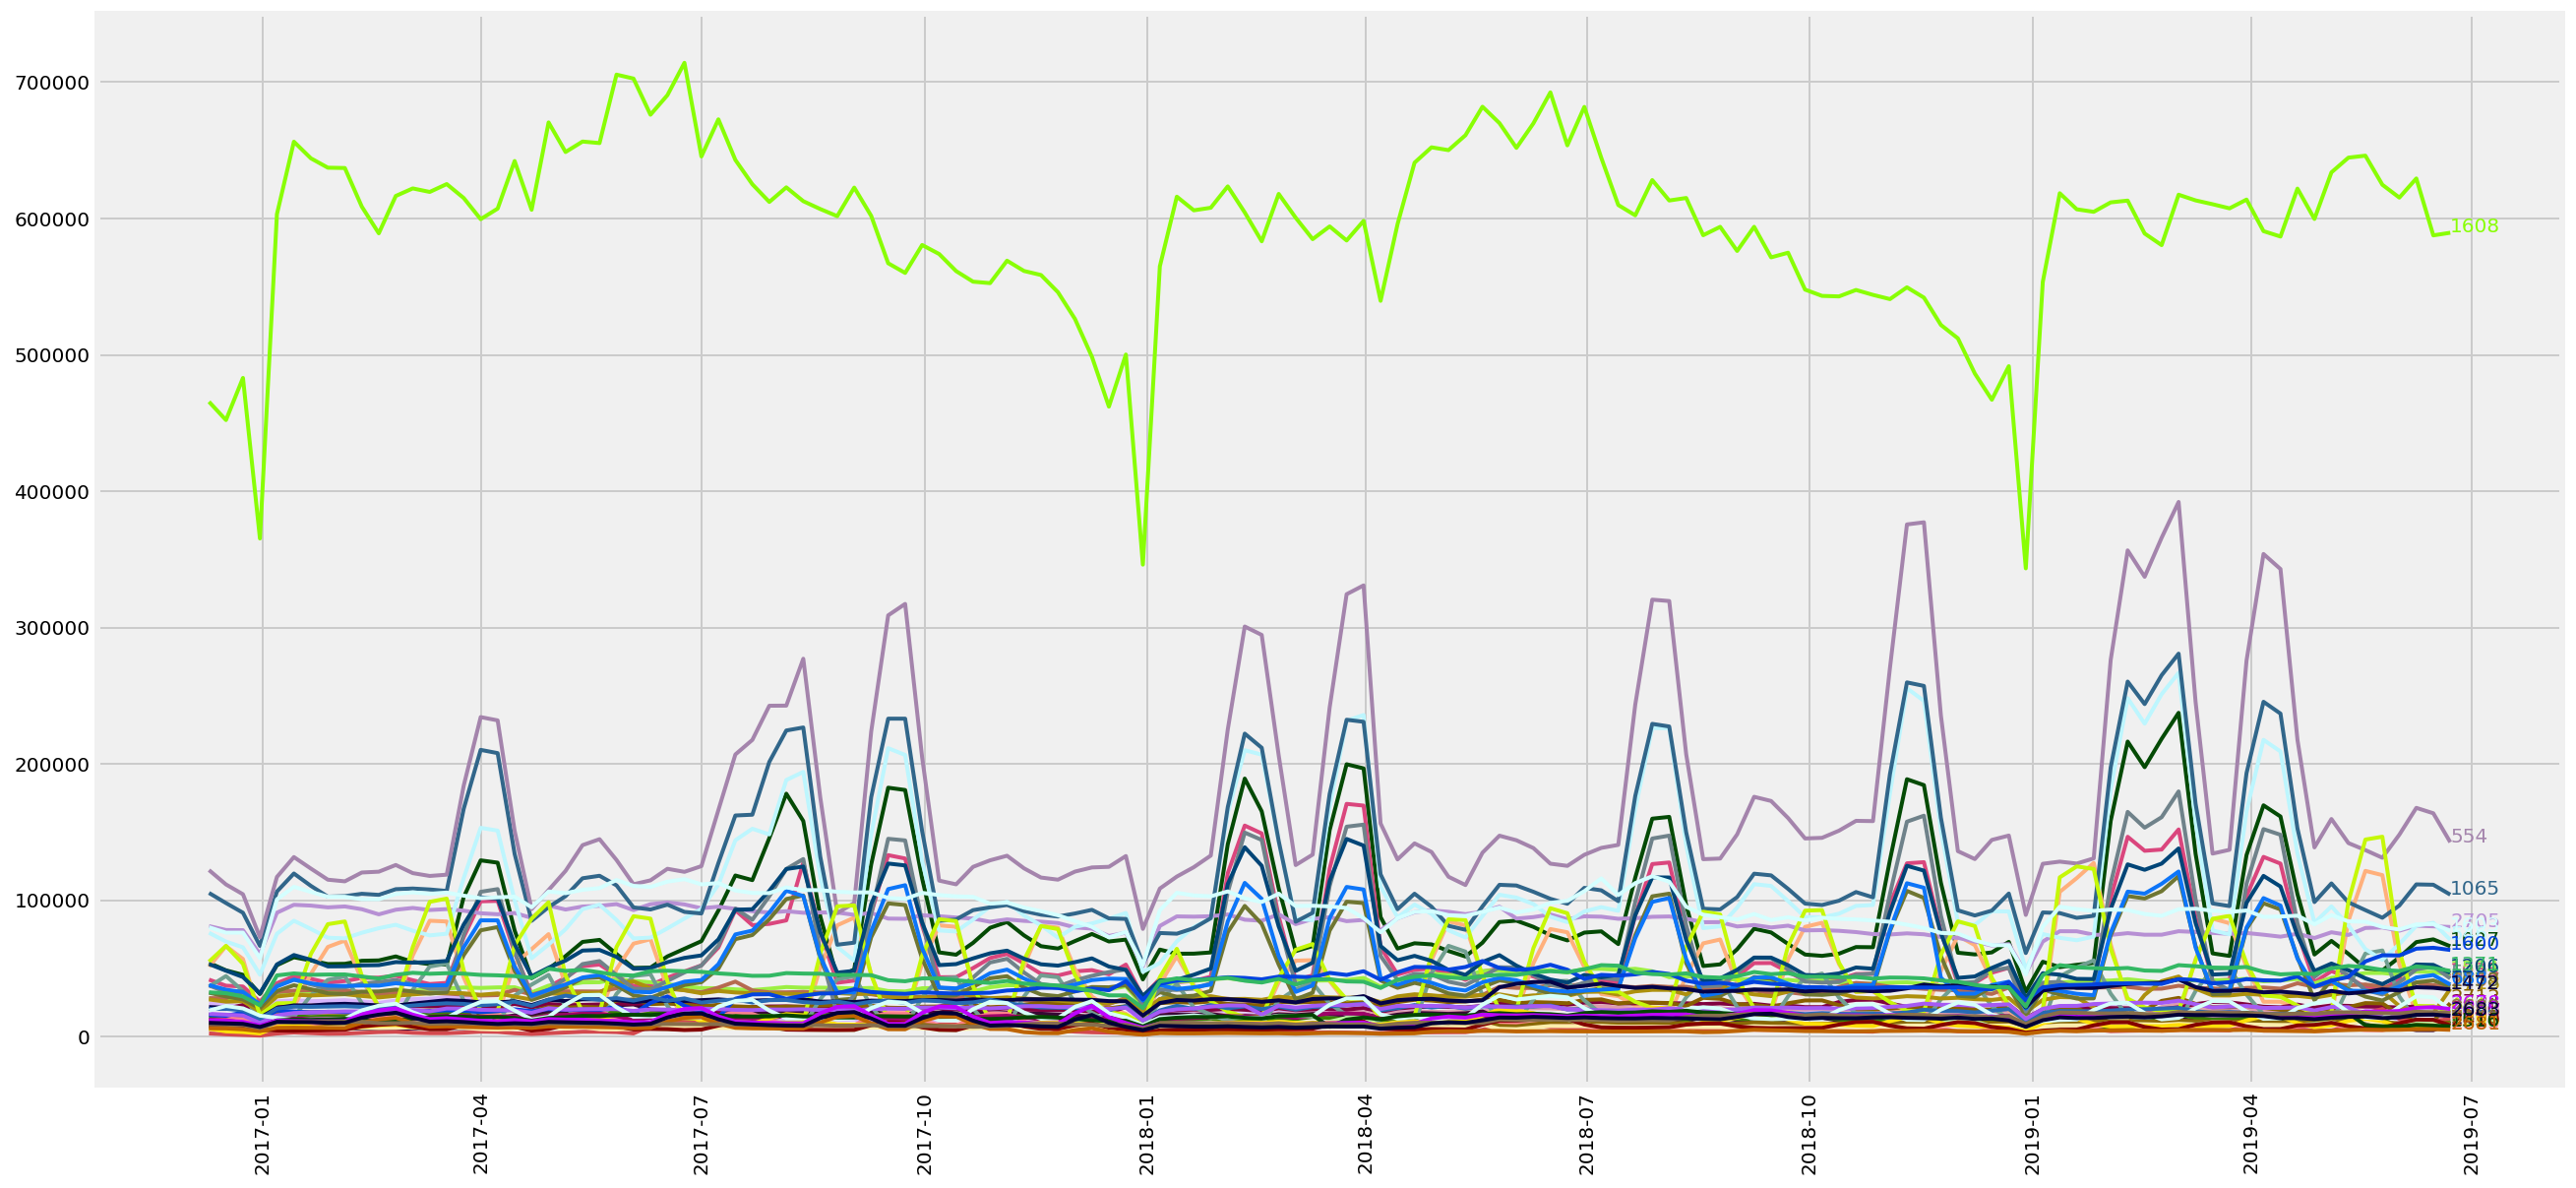

In [153]:
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(set(df.SKU)), replace=False)

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
for i,s in enumerate(set(df.SKU)):
    plt.plot(train[train.SKU==s].Date, train[train.SKU==s].target, color=mycolors[i])
    last_x, last_y = train[train.SKU==s].Date.values[-1], train[train.SKU==s].target.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])

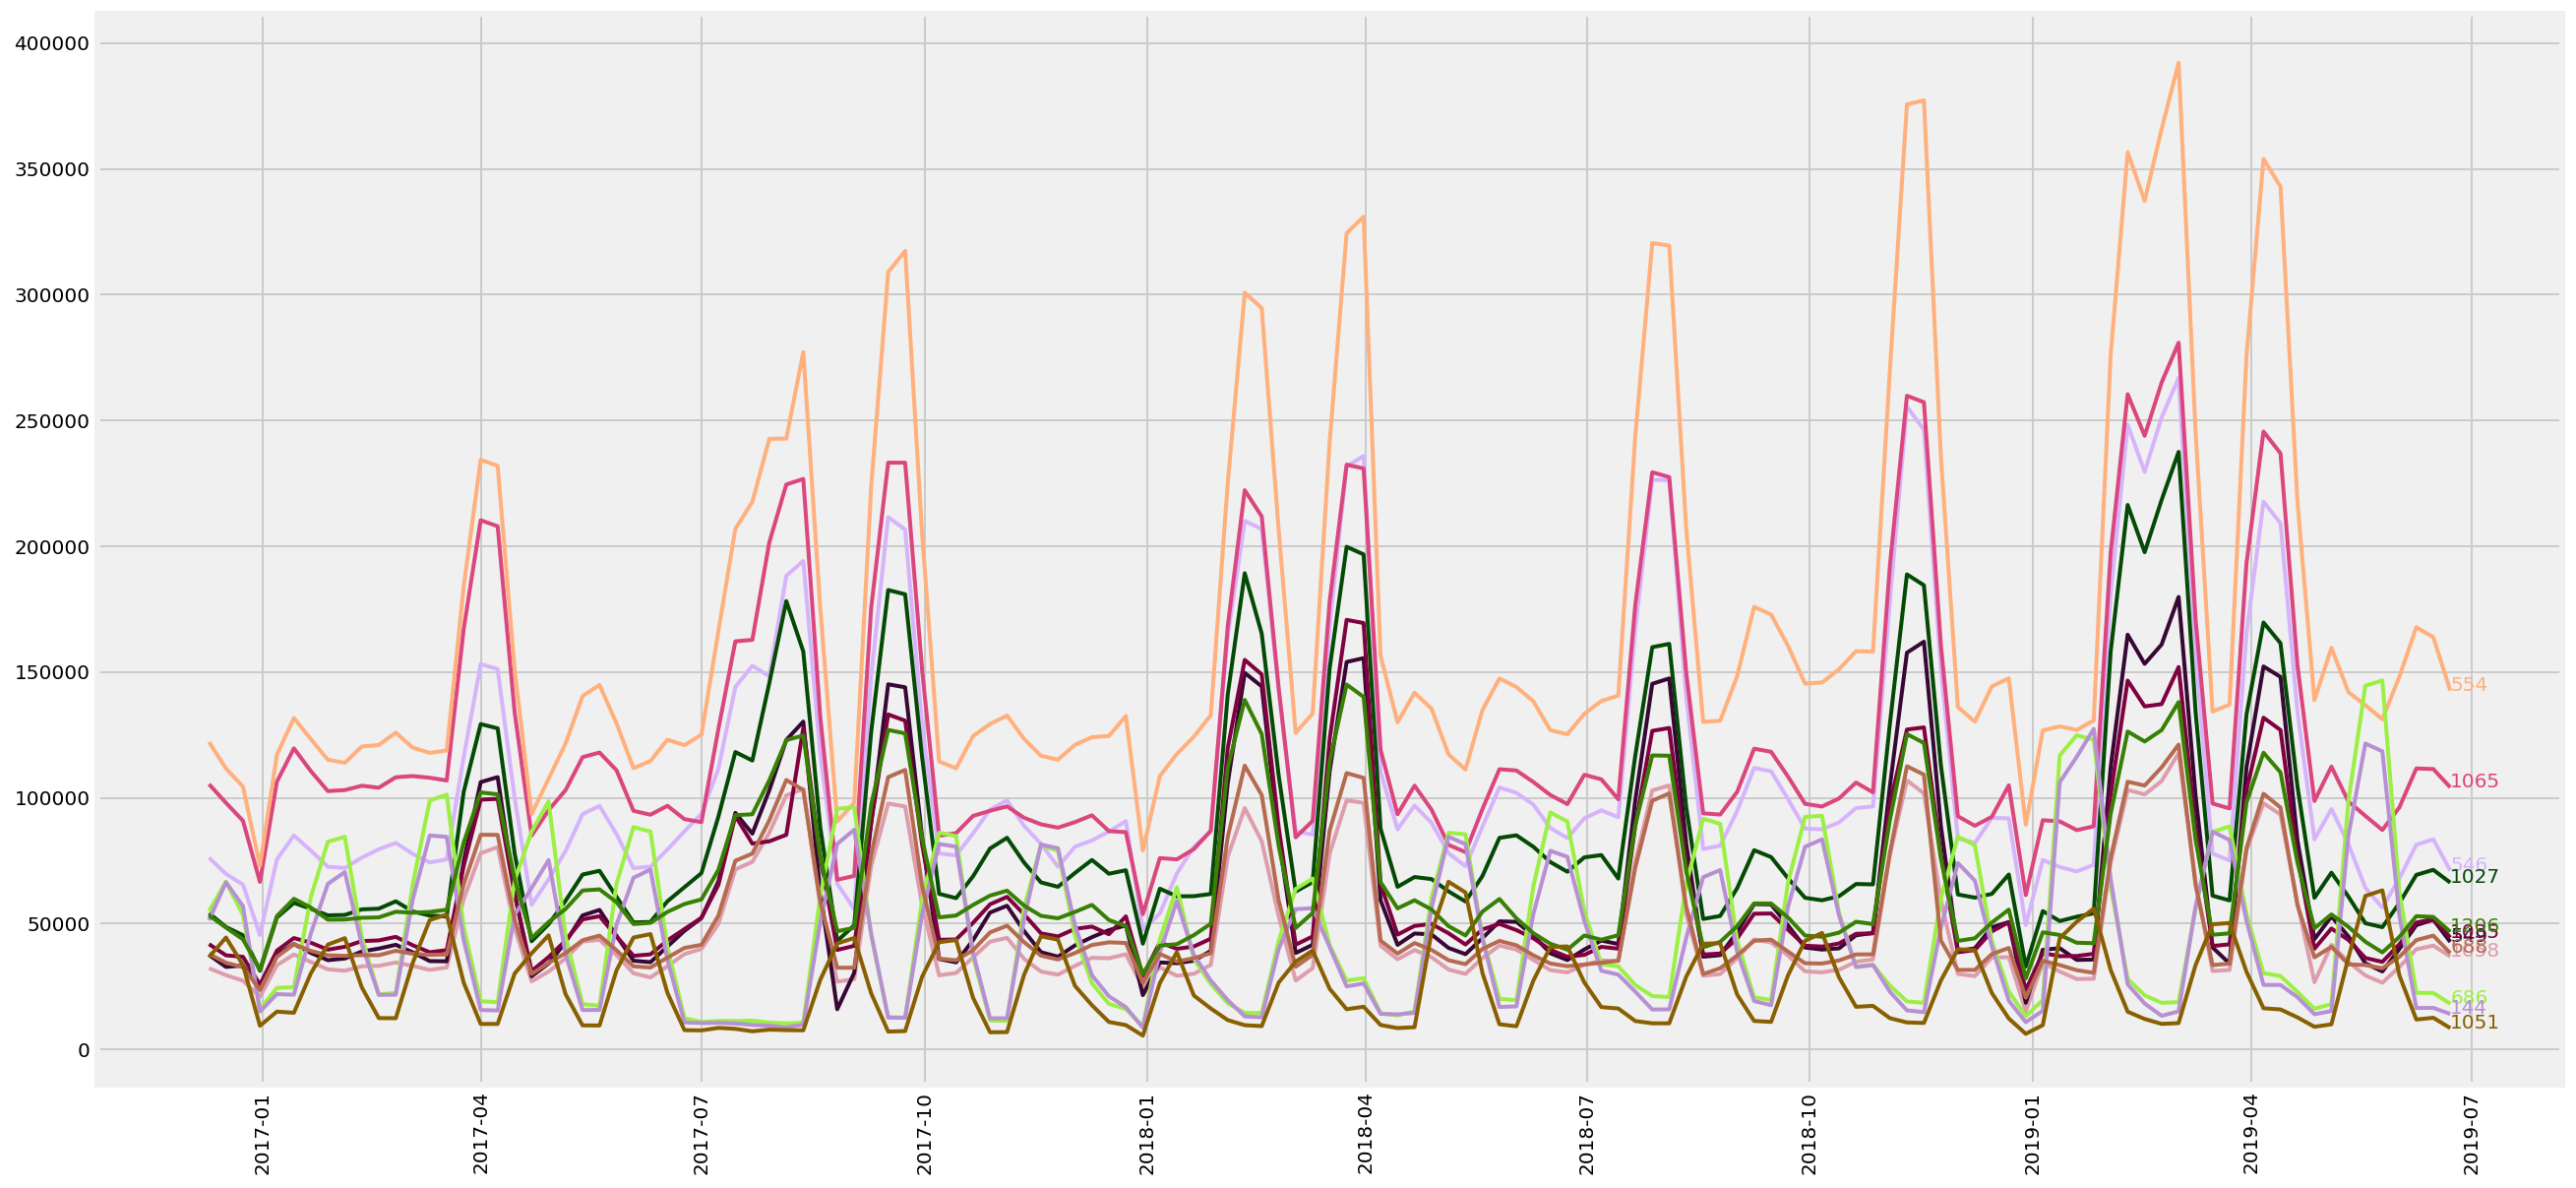

In [165]:
# Only 12 sku in the scope

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

for i,s in enumerate(set(df[df.scope==1].SKU)):
    plt.plot(train[train.SKU==s].Date, train[train.SKU==s].target, color=mycolors[i])
    last_x, last_y = train[train.SKU==s].Date.values[-1], train[train.SKU==s].target.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])

In [166]:
same_brand_sku = []
for b in set(df.brand):
    same_brand_sku.append(set(df[df.brand==b].SKU))

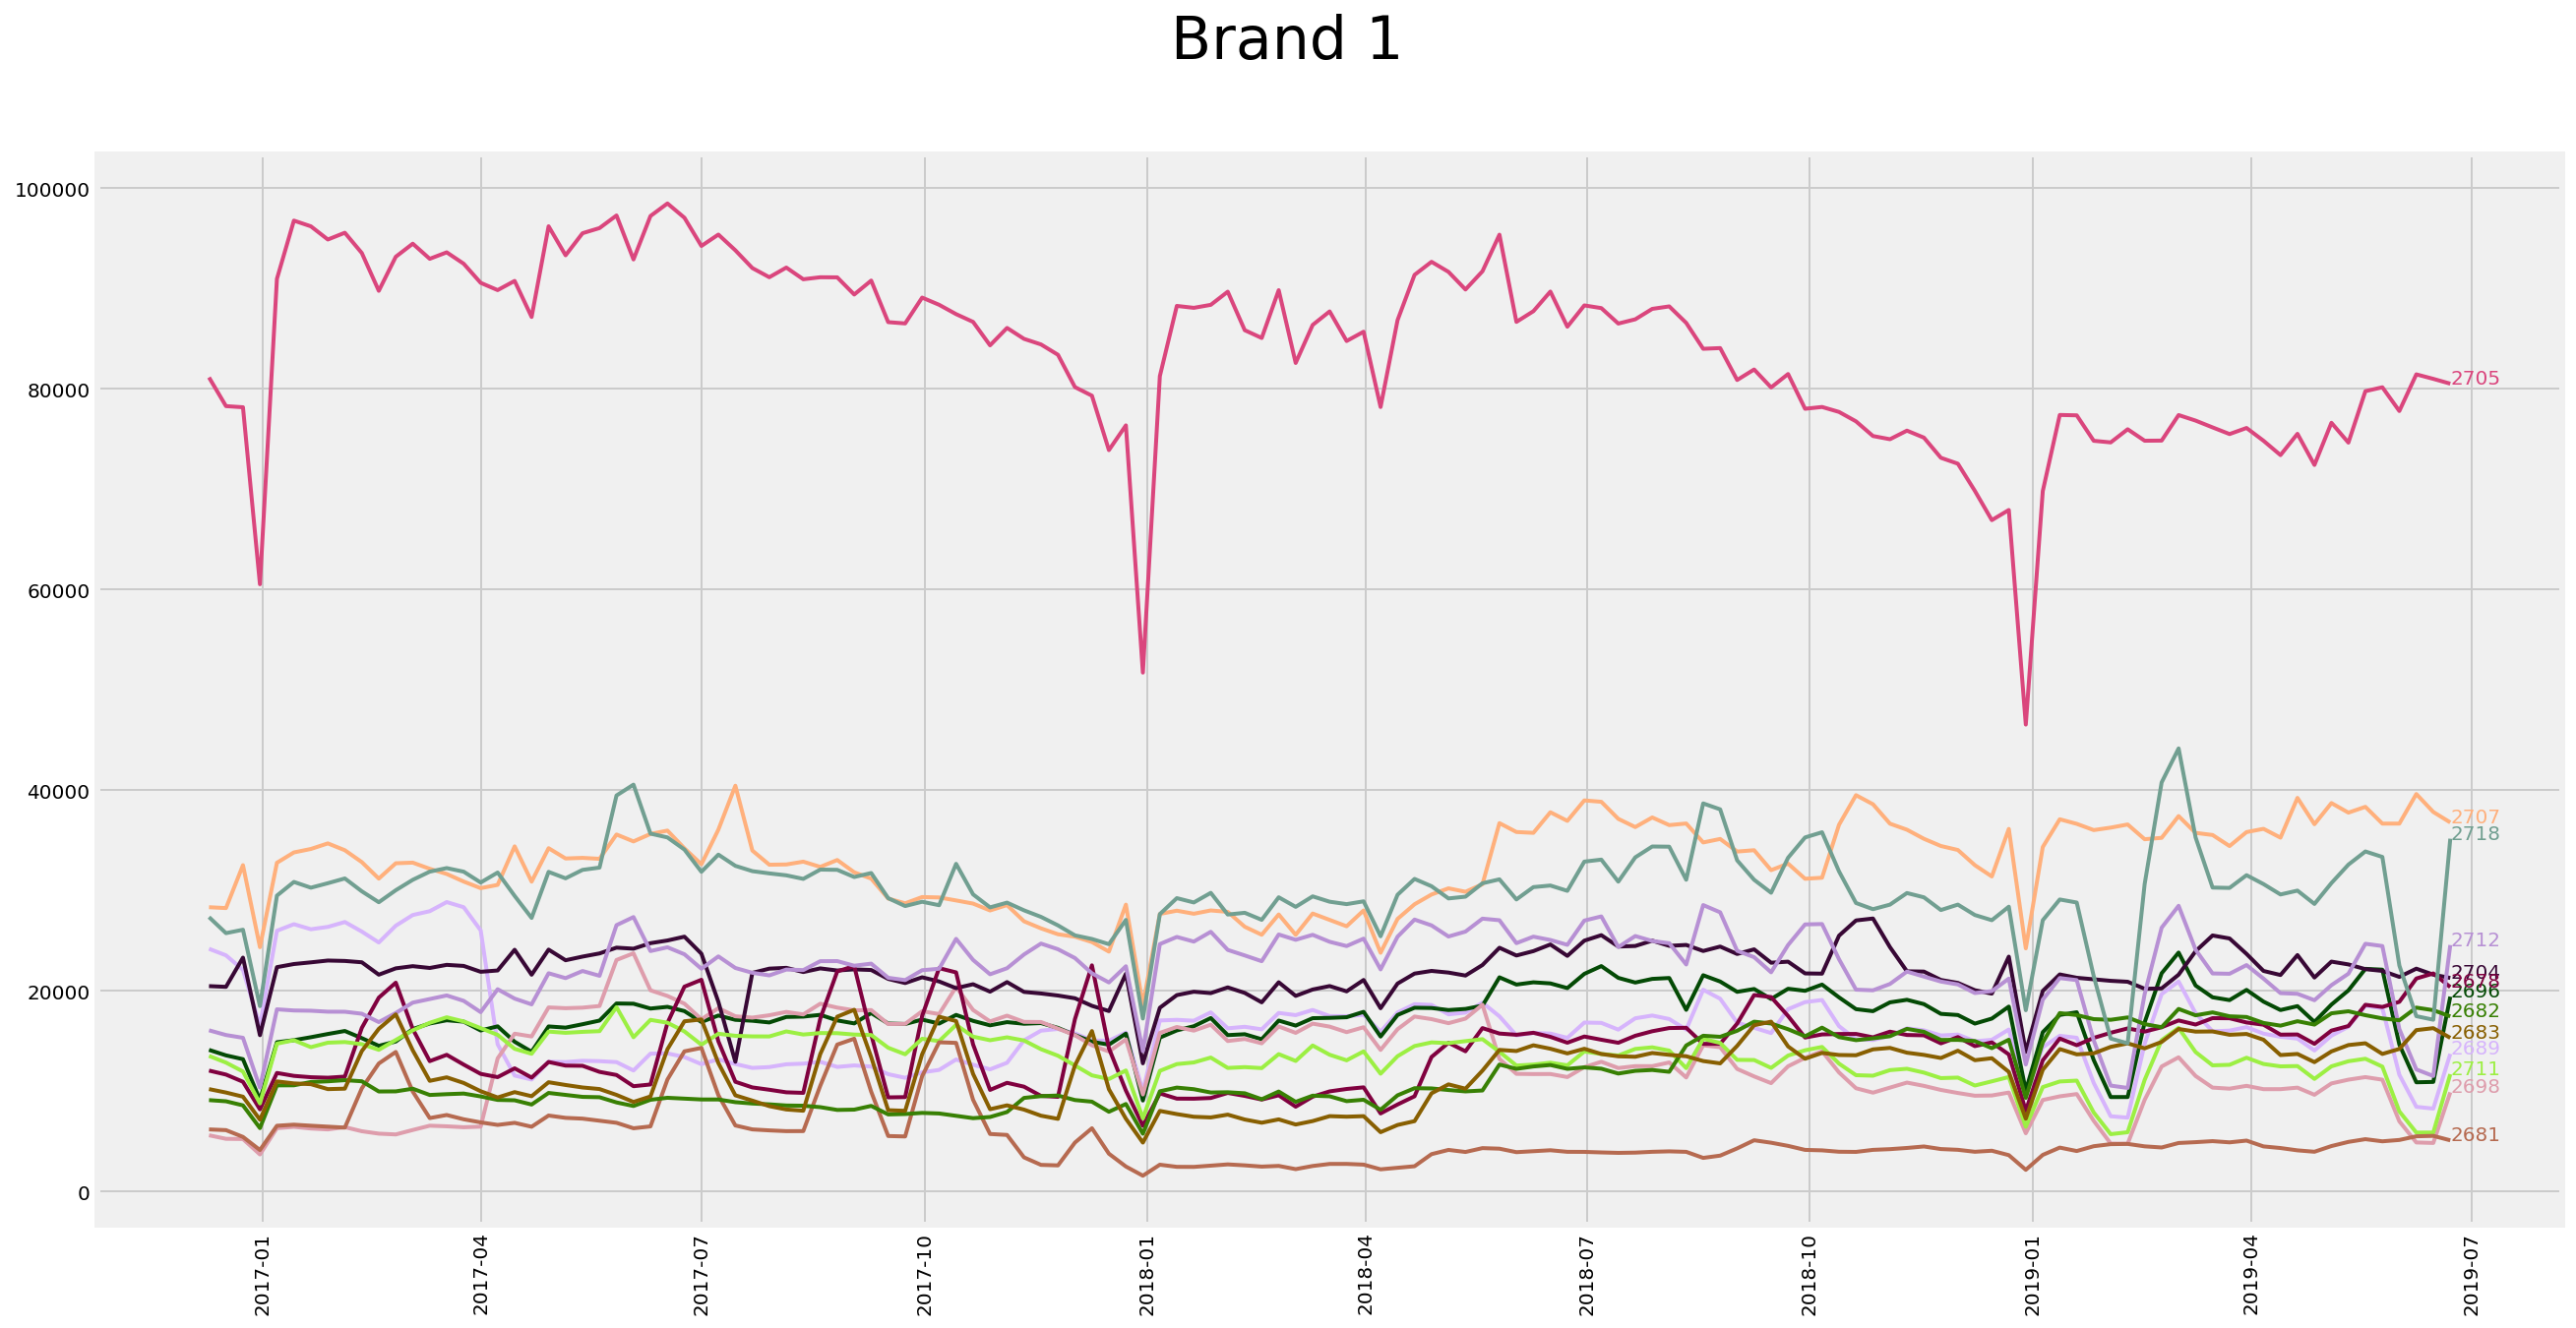

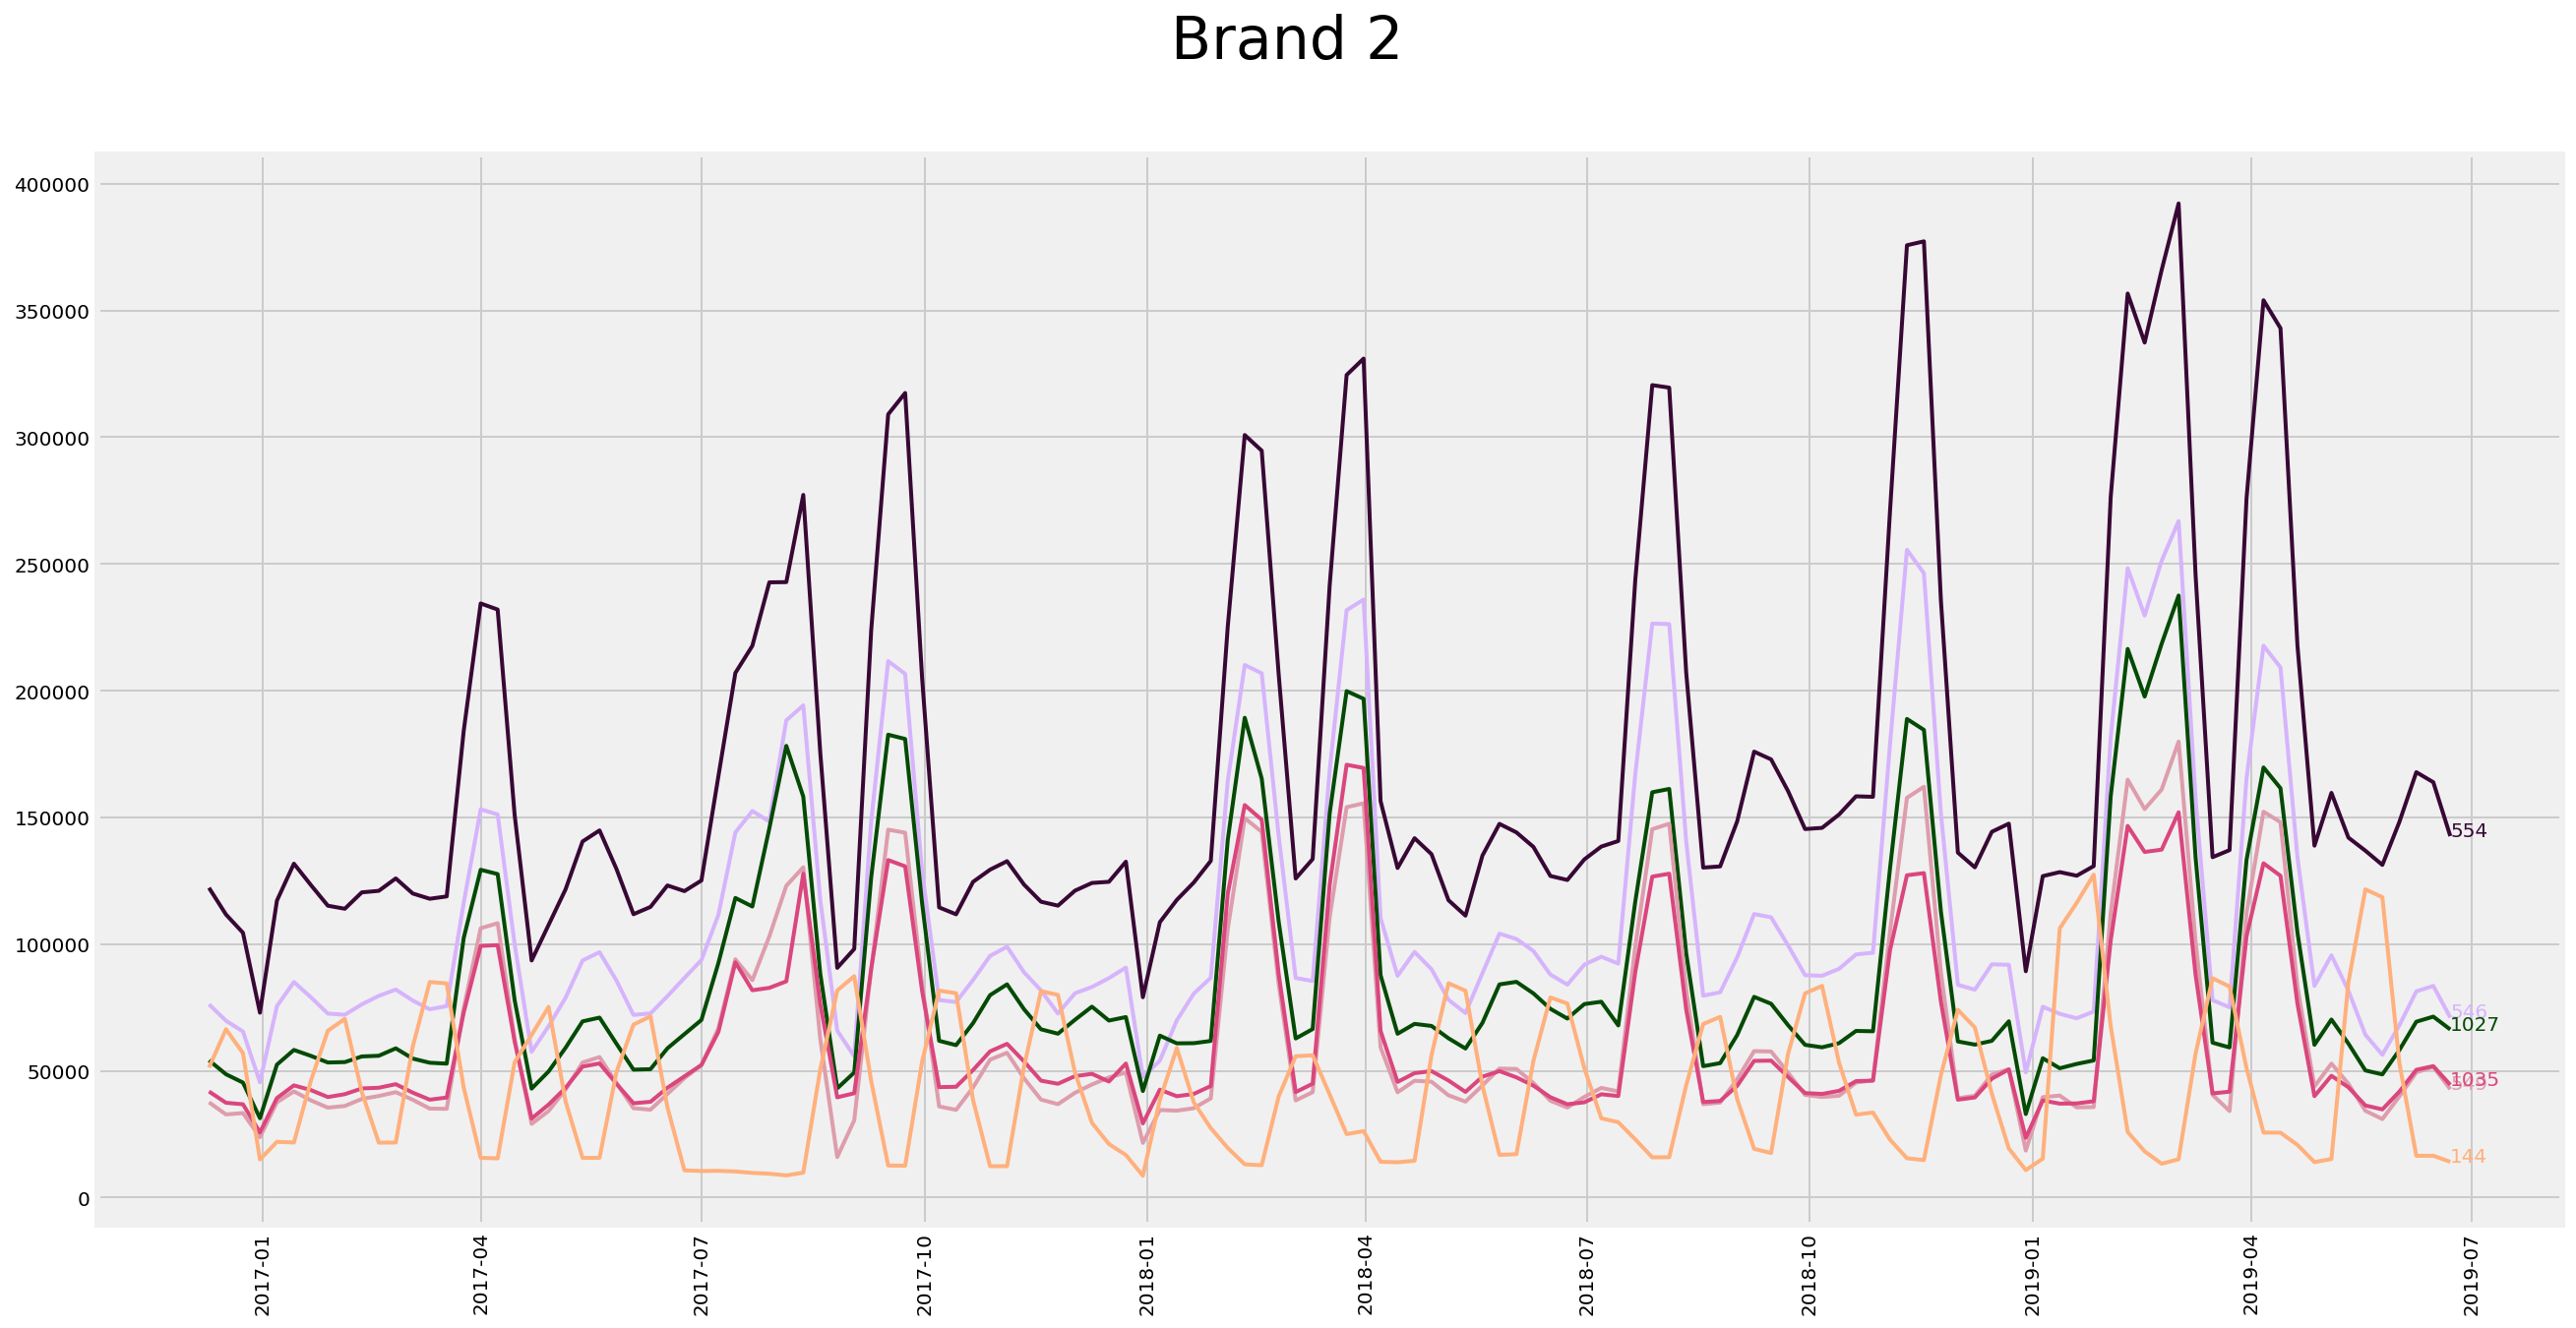

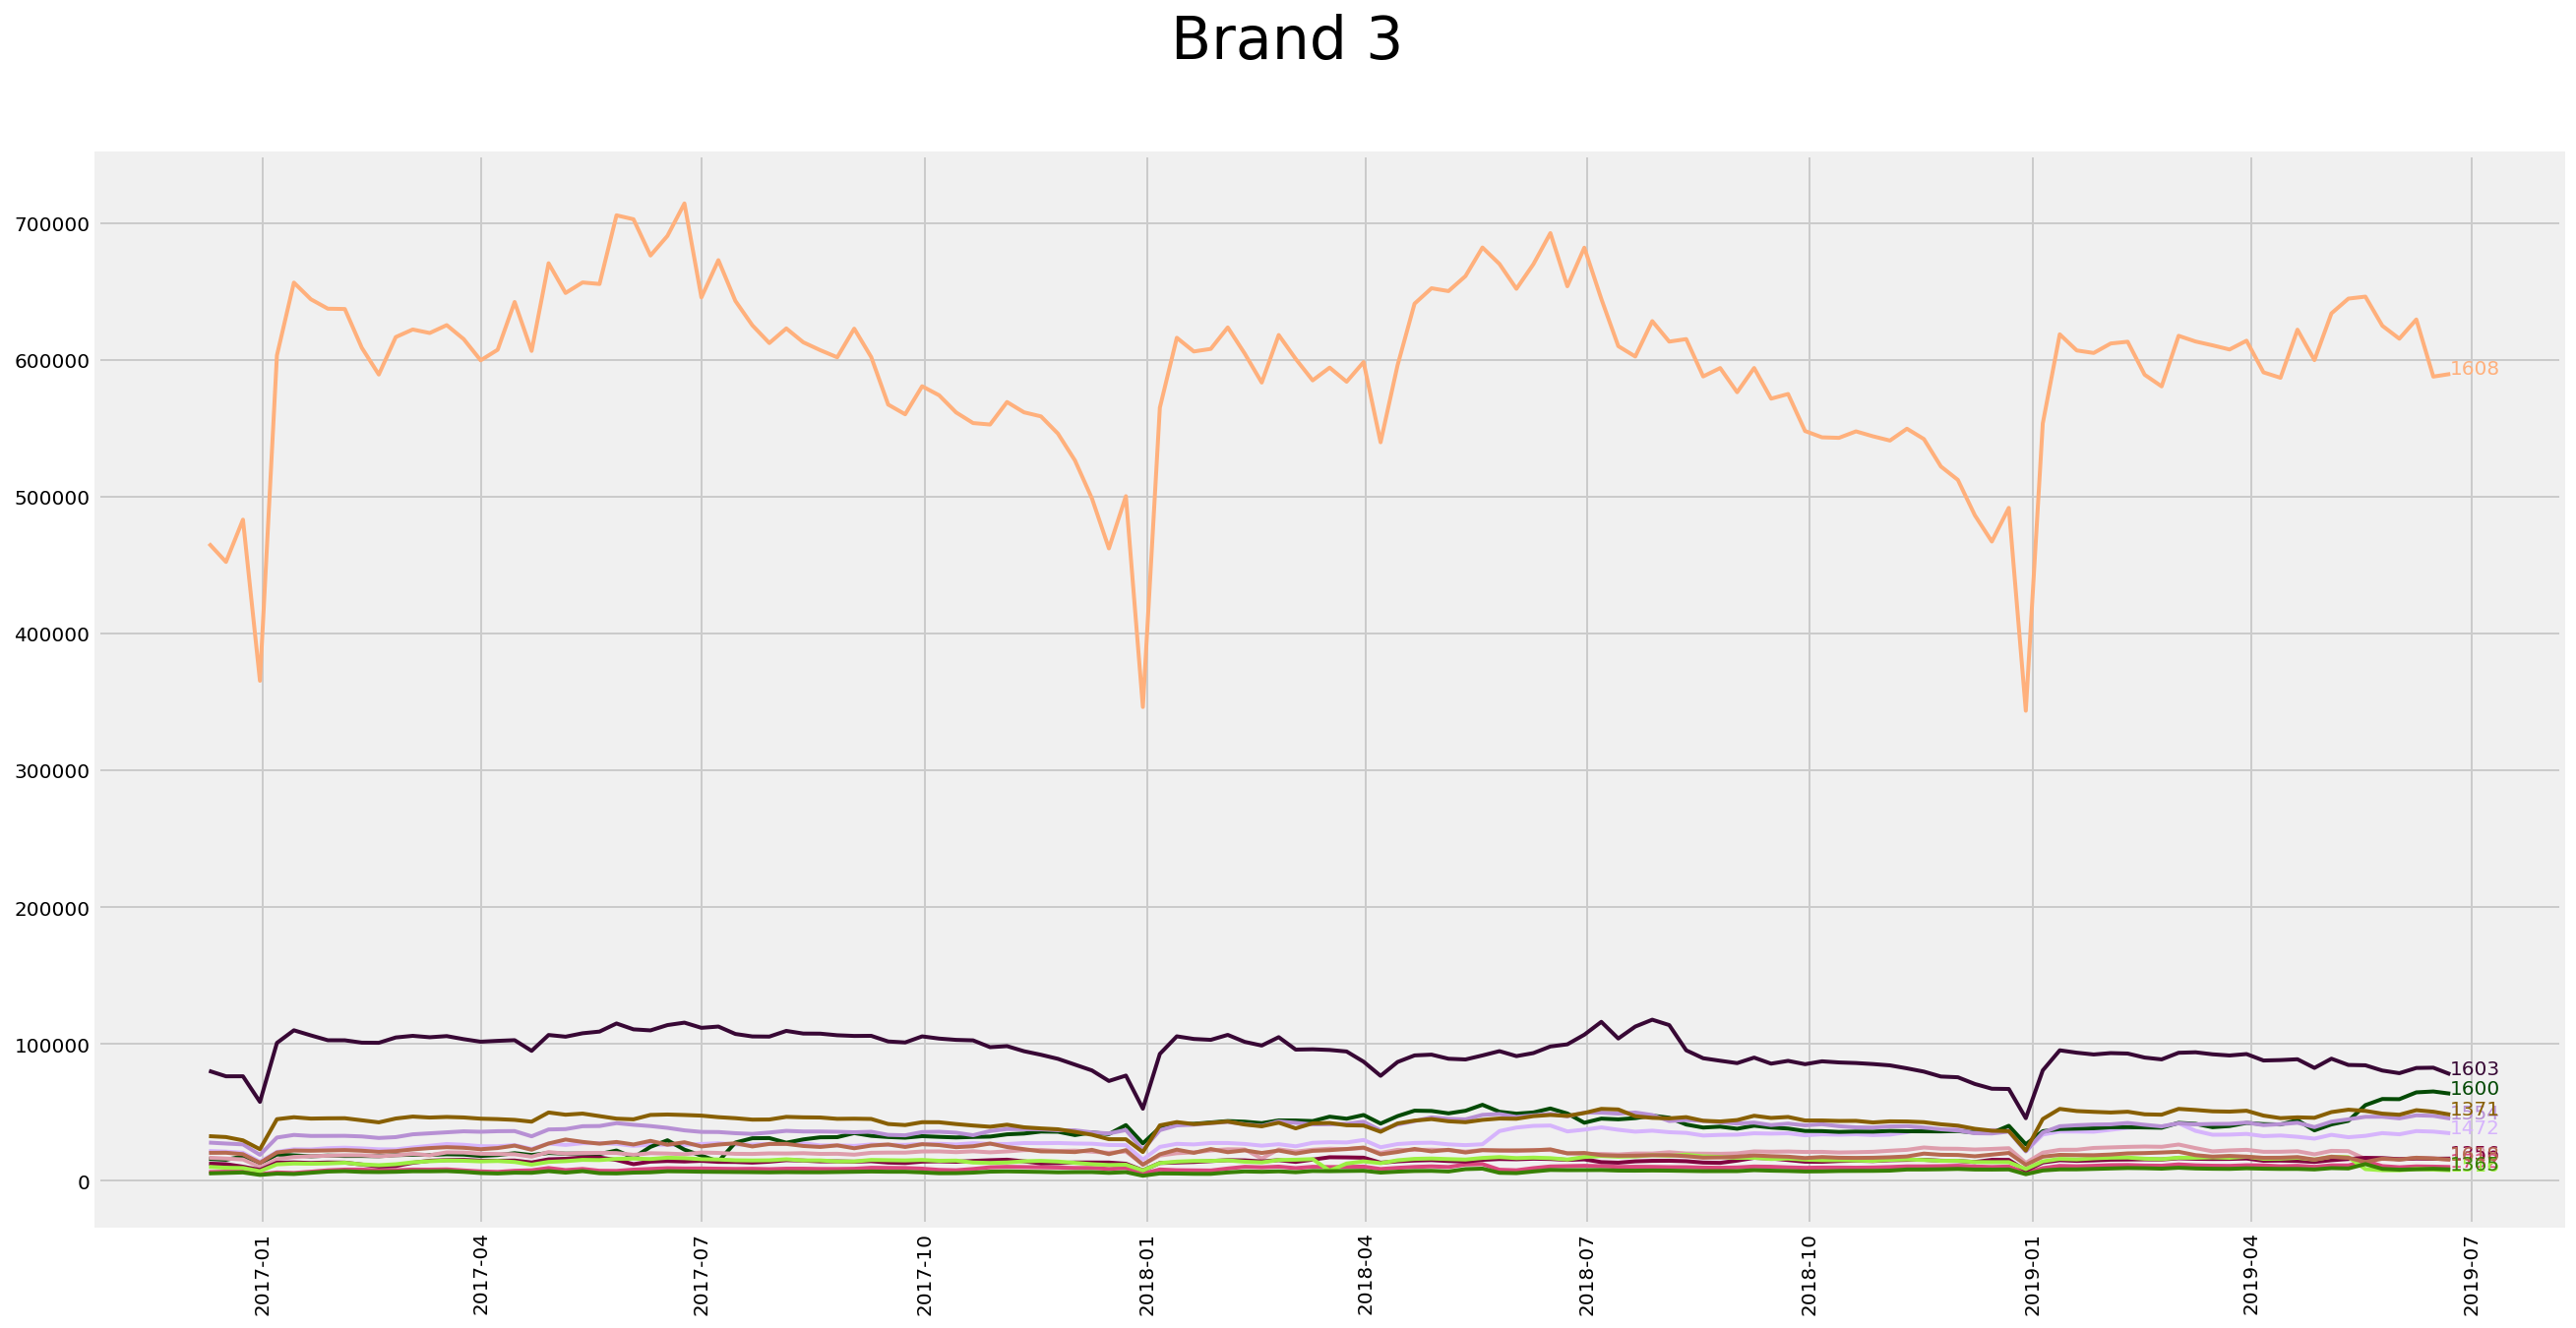

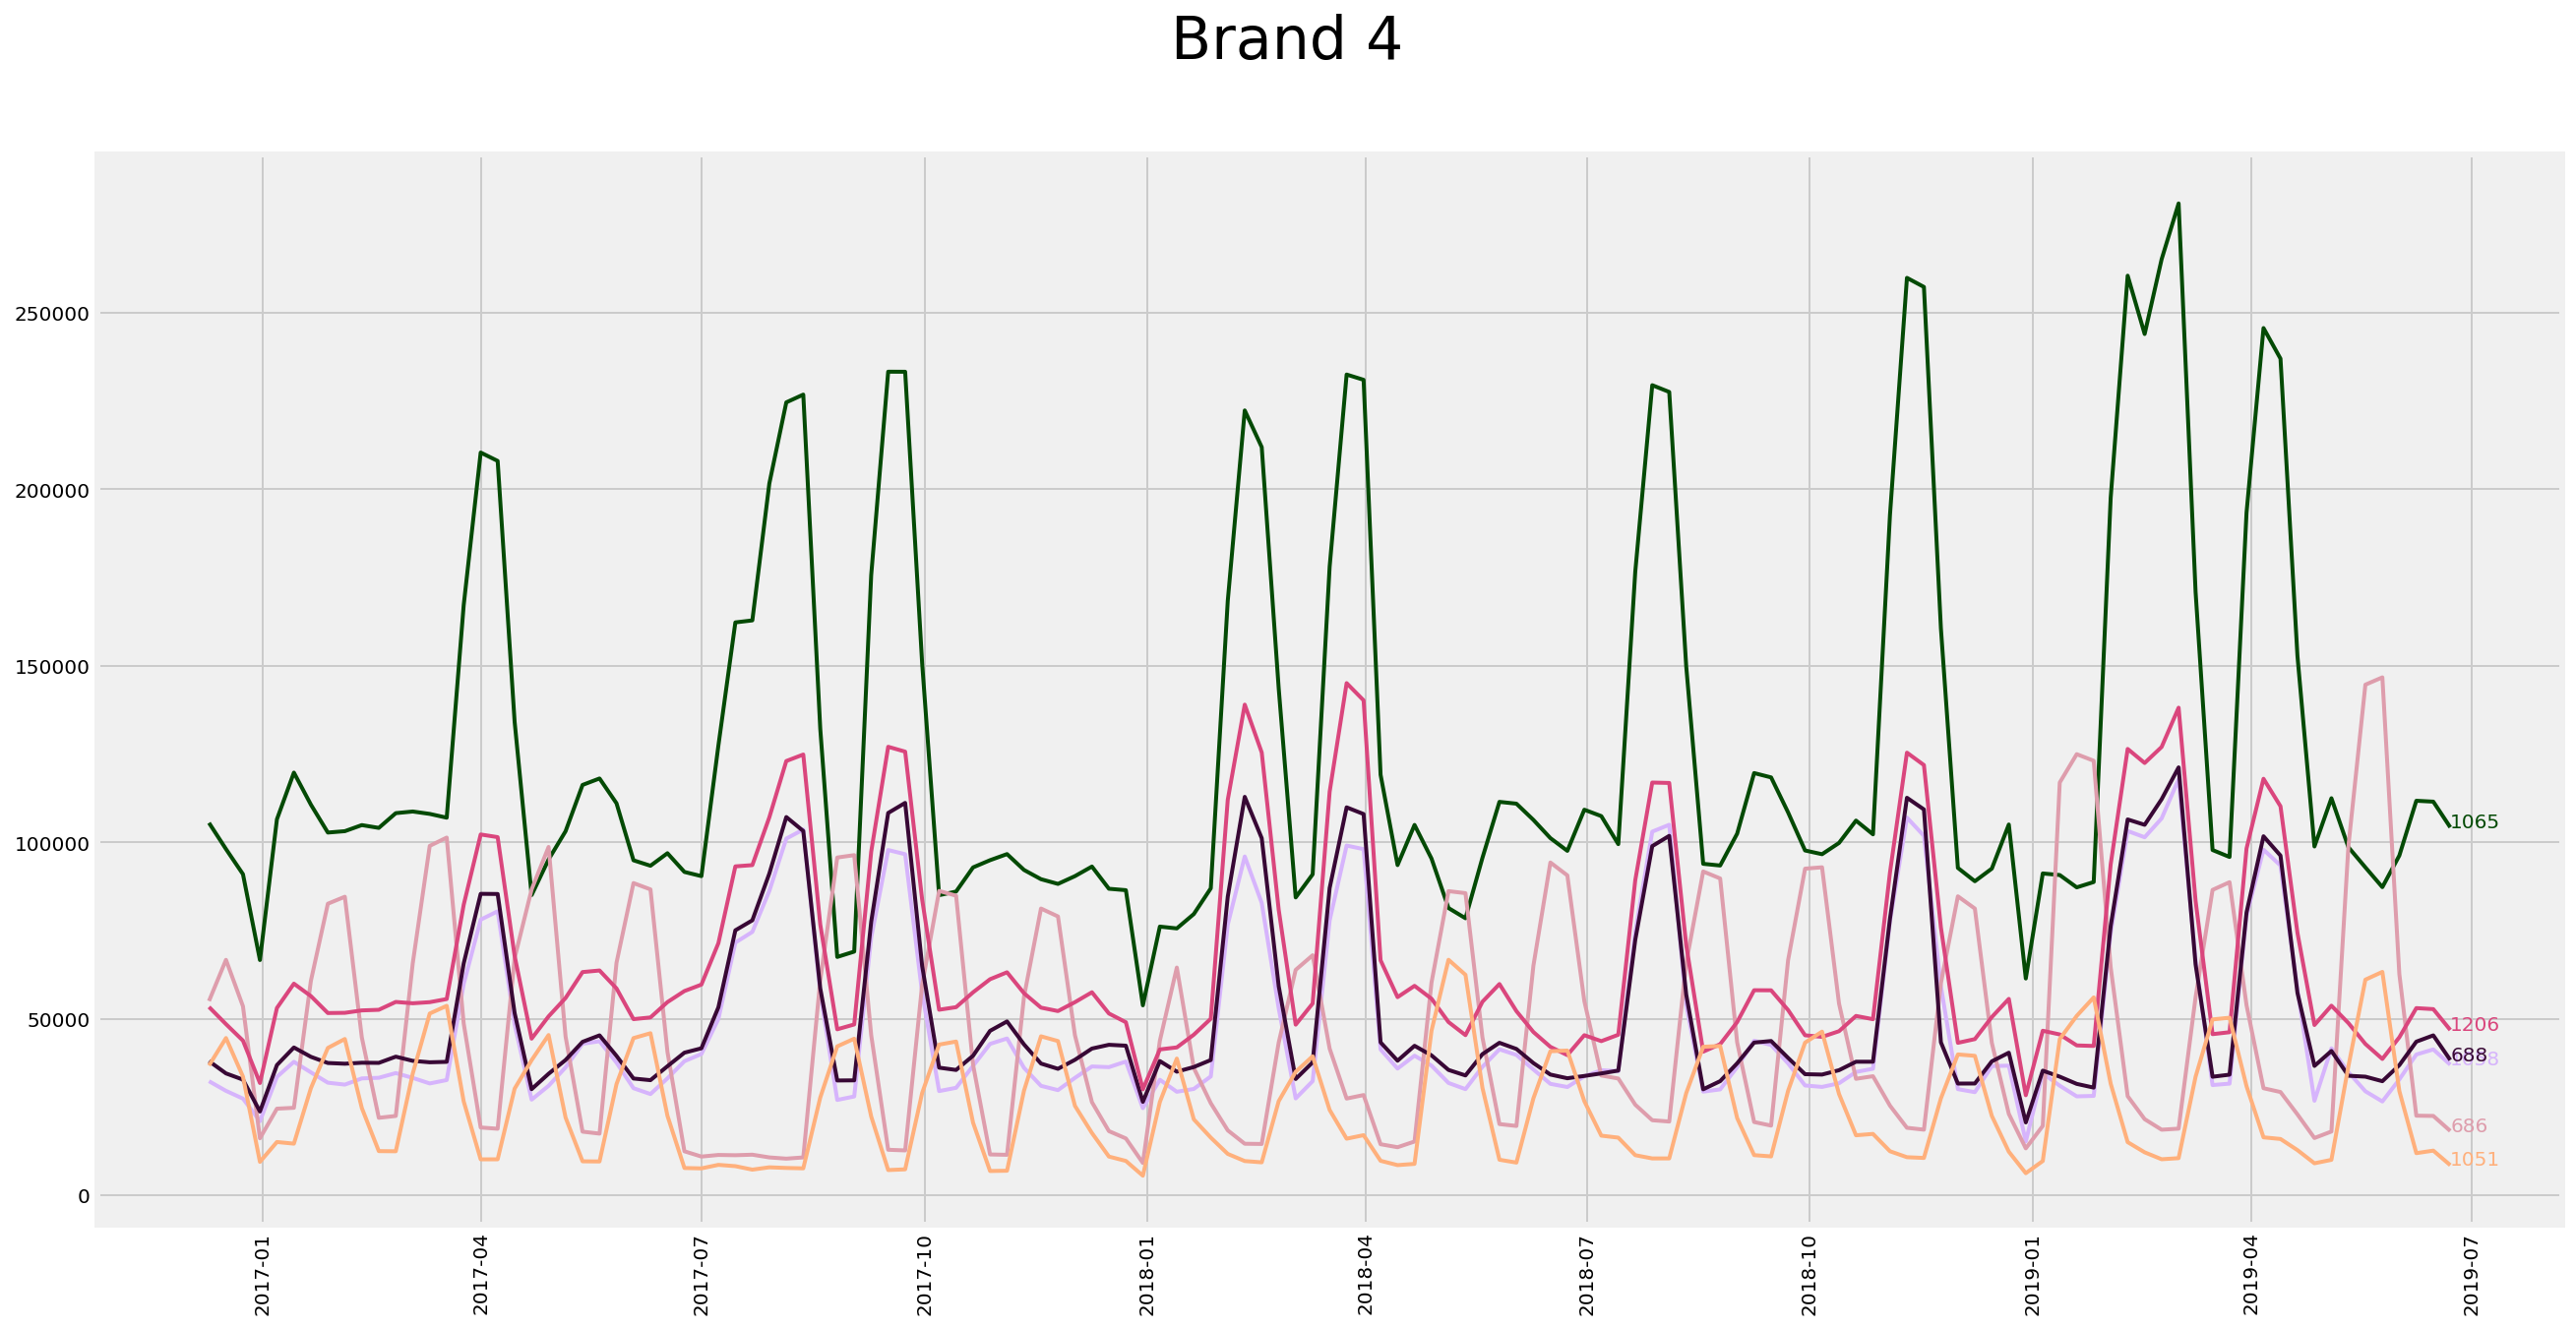

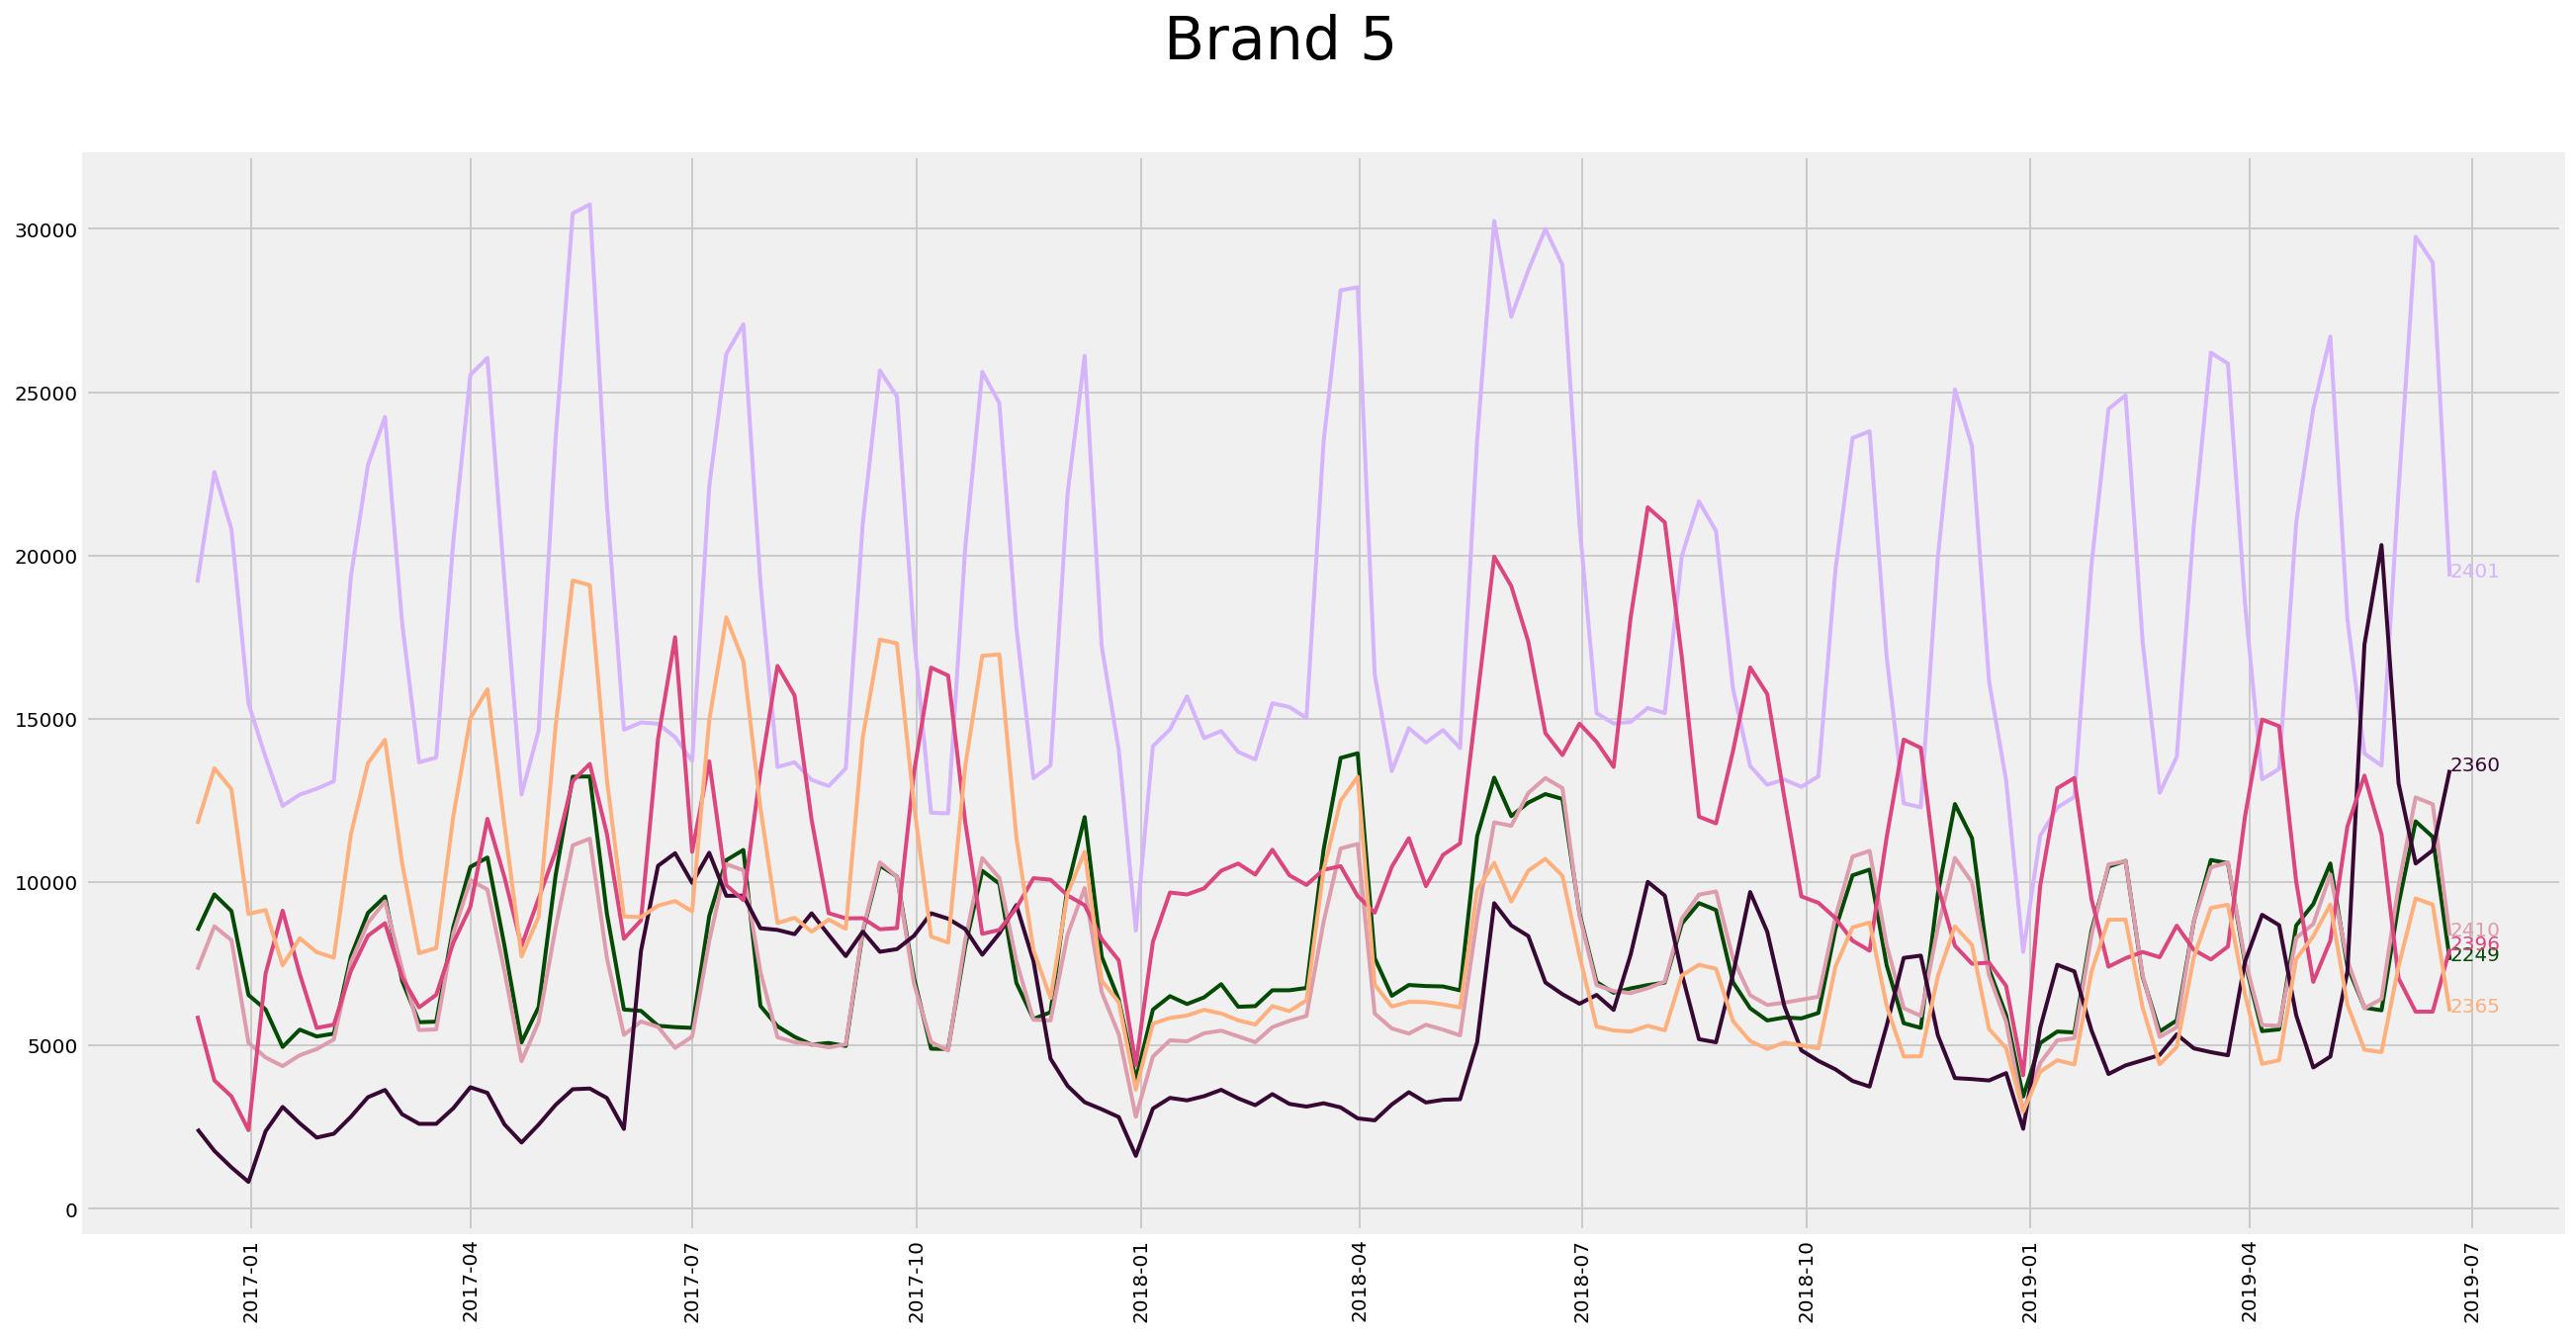

In [207]:
for b in range (0, len(same_brand_sku)):
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    plt.suptitle("Brand " + str(b+1), fontsize=30, fontdict=dict(weight='bold'))
    
    for i,s in enumerate(same_brand_sku[b]):
        plt.plot(train[train.SKU==s].Date, train[train.SKU==s].target, color=mycolors[i])
        last_x, last_y = train[train.SKU==s].Date.values[-1], train[train.SKU==s].target.values[-1]
        plt.text(last_x, last_y, str(s), color=mycolors[i])

In [ ]:
for i,s in enumerate(set(df[df.scope==1].SKU)):
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=90)
    plt.suptitle(str(i), fontsize=40)
    
    plt.plot(train[train.SKU==s].Date, train[train.SKU==s].target, color=mycolors[i])
    last_x, last_y = train[train.SKU==s].Date.values[-1], train[train.SKU==s].target.values[-1]
    plt.text(last_x, last_y, str(s), color=mycolors[i])

Text(0, 0.5, 'Target')

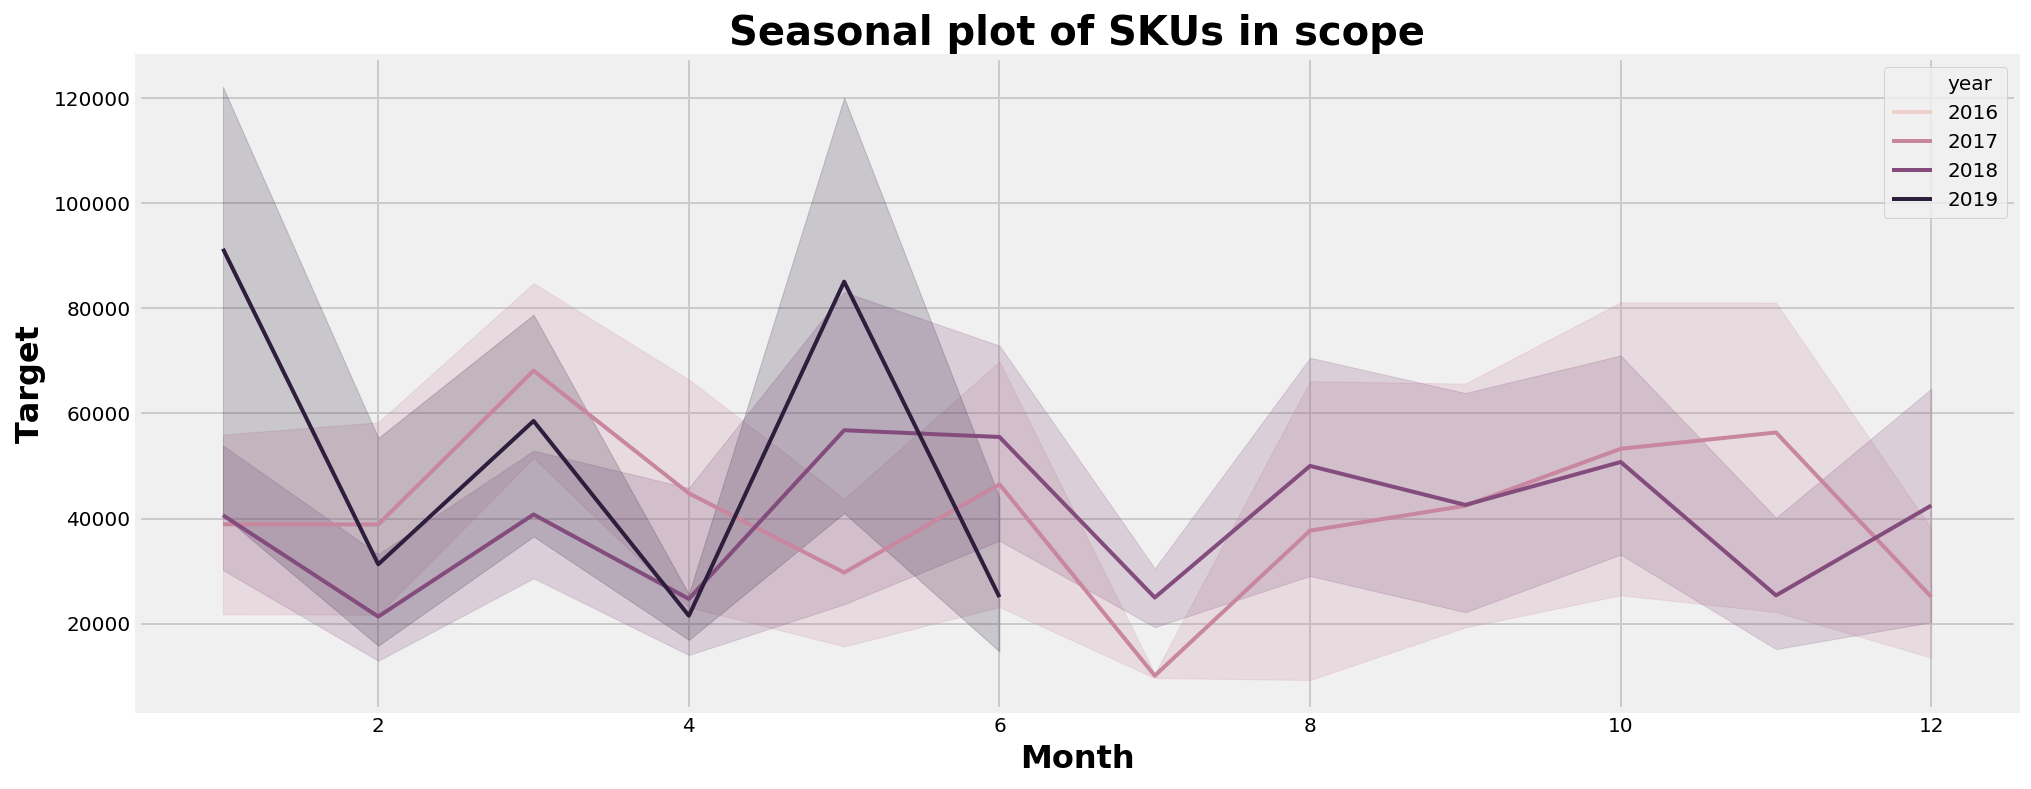

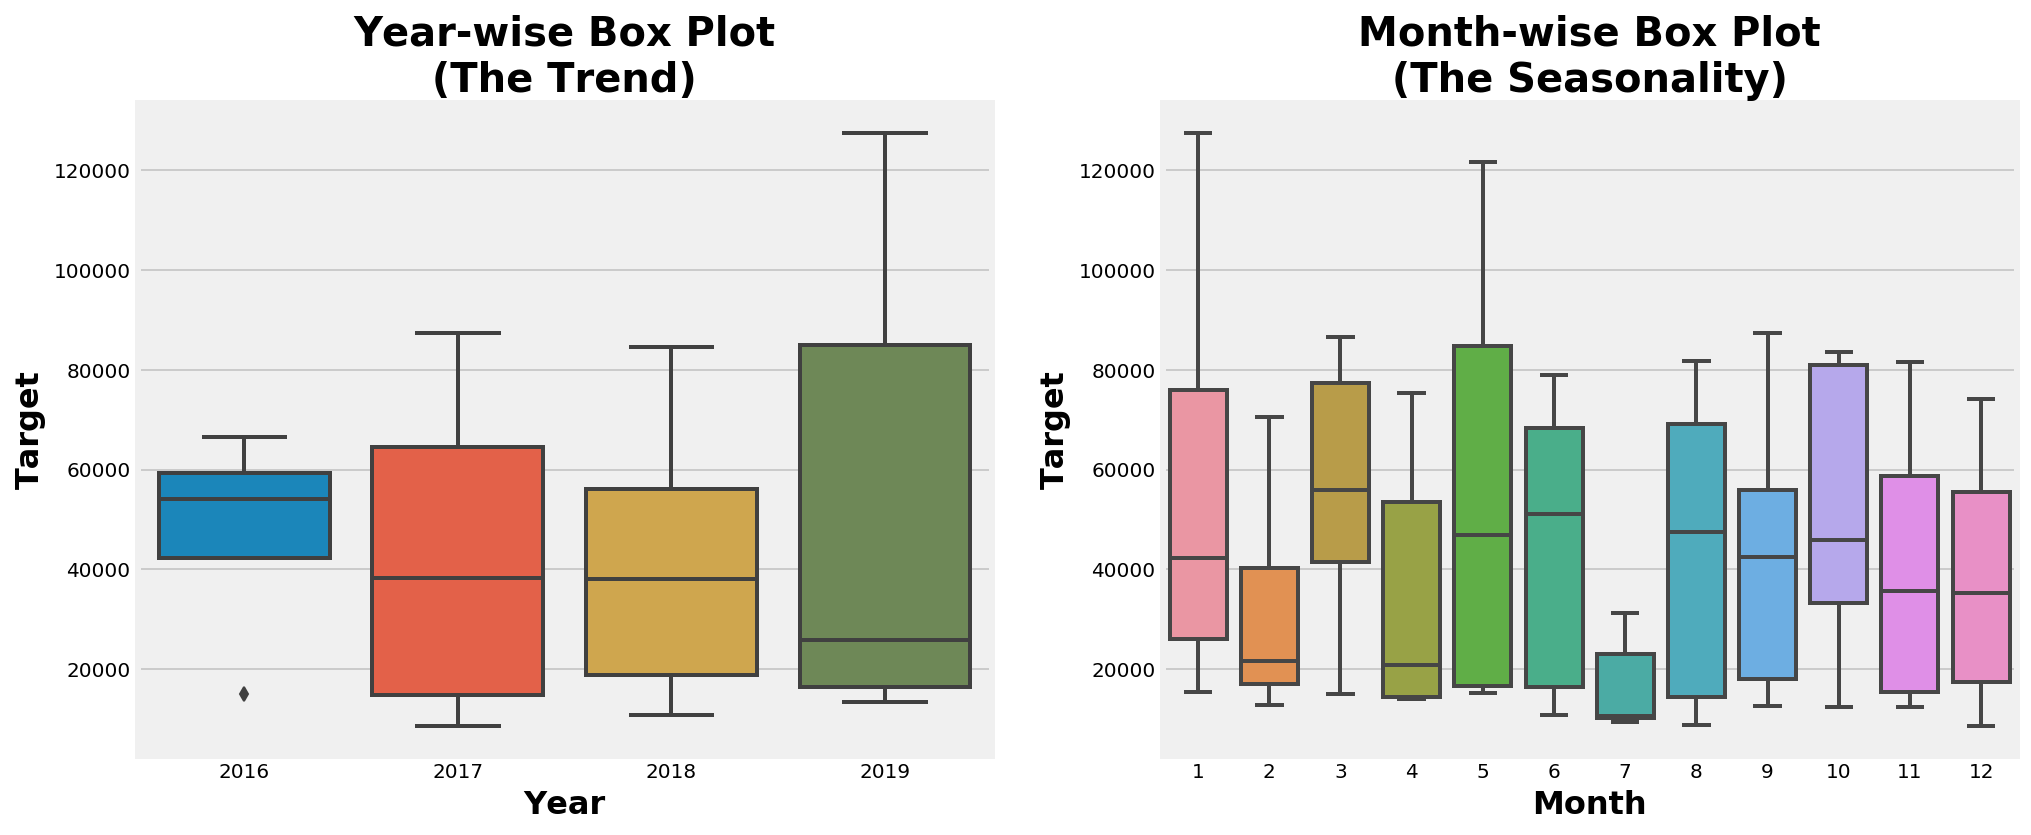

In [217]:
def _split_date(df_train: pd.DataFrame) -> pd.DataFrame:
    """
    Split date into days, month and year cols
    """
    date_list = [[x.split(" ")[1],x.split(" ")[2], x.split(" ")[3]] for x in df_train["Unnamed: 0"]]
    df_train['day'] = [int(x[0]) for x in date_list]
    df_train['month'] = [int(datetime.strptime(x[1], "%B").month) for x in date_list]
    df_train['year'] = [int(x[2]) for x in date_list]
    return df_train.drop(['Unnamed: 0'], axis=1)

date_split_train = _split_date(pd.read_csv("../dataset/train.csv"))
new_train = date_split_train[date_split_train.scope==1]

#Try with only one sku
new_train = new_train[new_train.sku==144]

variable = 'target'
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette() #"ch:2.5,-.2,dark=.3", 10)
sns.lineplot(new_train['month'], new_train[variable], hue=new_train['year'])#, palette=palette)
ax.set_title('Seasonal plot of SKUs in scope', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize=16, fontdict=dict(weight='bold'))
ax.set_ylabel('Target', fontsize=16, fontdict=dict(weight='bold'))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(new_train['year'], new_train[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Target', fontsize=16, fontdict=dict(weight='bold'))

sns.boxplot(new_train['month'], new_train[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize=16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Target', fontsize=16, fontdict=dict(weight='bold'))
